In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [12]:
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [13]:
xtrain.shape

(60000, 28, 28)

In [9]:
from tensorflow.keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

In [11]:
xtrain.shape

(50000, 32, 32, 3)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [47]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
y_train.shape

(50000, 1)

In [49]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [50]:
y_train[0:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
    # # Convert labels to categorical
    # y_train = tf.keras.utils.to_categorical(y_train, 10)
    # y_test = tf.keras.utils.to_categorical(y_test, 10)

In [51]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [52]:
y_train[0:3]

array([6, 9, 9], dtype=uint8)

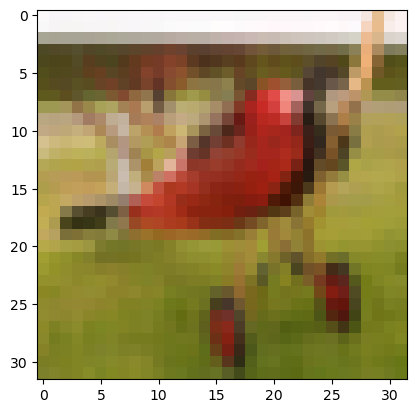

In [53]:
plt.imshow(x_train[35])

In [61]:
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [62]:
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [63]:
early = EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)

In [64]:
hist = cnn.fit(
    x_train,
    y_train,
    epochs=3,
    batch_size=64,
    validation_data=(x_test,y_test)
)

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.4559 - loss: 1.5636 - val_accuracy: 0.5817 - val_loss: 1.1593
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.6638 - loss: 0.9637 - val_accuracy: 0.5795 - val_loss: 1.2146
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.7227 - loss: 0.7961 - val_accuracy: 0.6587 - val_loss: 1.0063


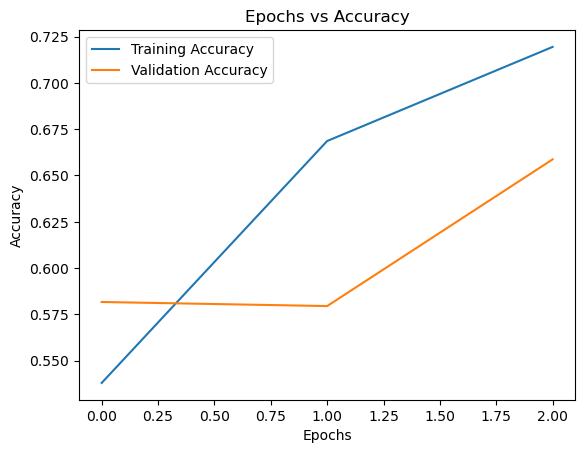

In [65]:
plt.plot(hist.history["accuracy"],label="Training Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

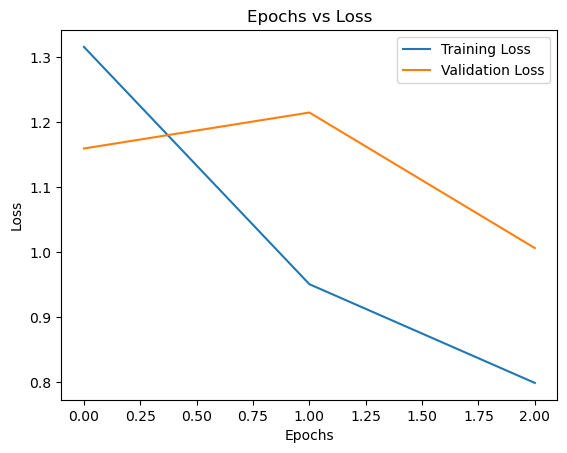

In [66]:
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()